In [177]:
%matplotlib inline
%config IPCompleter.greedy=True

import copy
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
import scipy.stats as st
import auxiliary_functions as aux
import dfa_functions as dfaf
from scipy.optimize import curve_fit


pd.options.display.max_rows = 10

# Run the script to load the data (the series and their segmentation) and to delete all segments with indeterminate stage or whose max frequency is below 85%
from load_data import load_data, redo_classification
data, seg_res = load_data(filter = 0)
# Reclassificates the segments using the 4 stage system.
seg_res = redo_classification(seg_res, data)
from load_increments import load
increments = load(data, seg_res, 4)


# Aglutinates the segments statistics of all the subjects, distinguishing them only by their groups.
from aglutinates_statistics import aglutinates
means, medians, variances, lengths, t_i, t_f, delta_t = aglutinates(data, seg_res, 4)



In [17]:
print(plt.style.available)

['seaborn-talk', 'fivethirtyeight', 'seaborn-bright', 'classic', 'seaborn-poster', 'seaborn-colorblind', 'seaborn-paper', 'seaborn-notebook', 'Solarize_Light2', 'seaborn-darkgrid', 'seaborn-muted', 'seaborn', 'seaborn-ticks', 'seaborn-whitegrid', 'dark_background', 'tableau-colorblind10', 'grayscale', 'ggplot', 'seaborn-deep', 'seaborn-dark-palette', 'seaborn-dark', 'fast', 'seaborn-pastel', '_classic_test', 'bmh', 'seaborn-white']


In [ ]:
plt.style.use('ggplot')

### Séries (Isoladas)

Text(0.5, 0.03, 'n° intervalo')

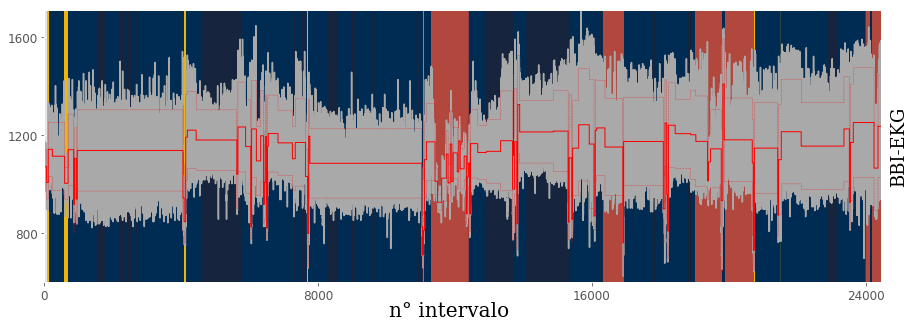

In [98]:
## Plota as séries

# Definição da função para gerar as cores de fundo
def axvlines(xs, c, max_val, ax=None, **plot_kwargs):
    """
    Draw vertical lines on plot
    :param xs: A scalar, list, or 1D array of horizontal offsets
    :param ax: The axis (or none to use gca)
    :param plot_kwargs: Keyword arguments to be passed to plot
    :return: The plot object corresponding to the lines.
    """
    if ax is None:
        ax = plt.gca()
    xs = np.array((xs, ) if np.isscalar(xs) else xs, copy=False)
    lims = ax.get_ylim()
    x_points = np.repeat(xs[:, None], repeats=3, axis=1).flatten()
    y_points = np.repeat(np.array(lims + (np.nan, ))[None, :], repeats=len(xs), axis=0).flatten()
    plot = ax.plot(x_points, max_val*y_points, scaley = False, **plot_kwargs, color = c)
    return plot

colors = ["#EFB509", "#002C54", "#16253D", "#B2473E"]
labels = ["Vigil", "Light", "Deep", "REM"]
groups = ["Hypertensive", "Normotensive", "Proband"]
t_serie = ["Serie 0", "Serie 1", "Serie 2", "Serie 3"]

grupo = 1
individuo = 13
serie = 2

fig, axs = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(15, 5)
        

result = seg_res[grupo][individuo][serie]
series = data[grupo][individuo][t_serie[serie]]
time = data[grupo][individuo].index
means = np.zeros(0)
hypnogram = np.zeros(0)
upper_band = np.zeros(0)
lower_band = np.zeros(0)
max_val = series.max()
min_val = series.min()

for i in result.index:
    size = int(result.loc[i,'finish'] - result.loc[i, 'start'] + 1)
    means = np.concatenate((means, np.full([size], result.loc[i, 'mean'])))
    hypnogram = np.concatenate((hypnogram, np.full([size], result.loc[i, "SleepStage"])))
    upper_band = np.concatenate((upper_band, result.loc[i, 'mean'] + np.full([size], np.sqrt(result.loc[i, 'variance']))))
    lower_band = np.concatenate((lower_band, result.loc[i, 'mean'] - np.full([size], np.sqrt(result.loc[i, 'variance']))))
            
for i in range(4):
    axvlines(data[grupo][individuo][data[grupo][individuo]["SleepStage"] == float(i)].index, colors[i], max_val, ax = axs)

axs.plot(time, series, color = 'darkgrey')
axs.plot(time, upper_band, 'r--', linewidth = 0.3, drawstyle = 'steps-post')
axs.plot(time, lower_band, 'r--', linewidth = 0.3, drawstyle = 'steps-post')
axs.plot(time, means, 'r-', linewidth = 1, drawstyle='steps-post', label='step-post')
axs.set_xticks(range(0, int(time[len(time)-1]), 5000))
axs.set_ylim(int(min_val) - 20, int(max_val))
axs.set_xlim(time[0], time[len(time)-1])
        
#fig.savefig("Plots/Series - Final, Com Cores de Fundo/"+t_grupo[grupo]+"/Subject"+str(individuo)+".png")
#plt.close()
series = ["SBP", "DBP", "BBI-P", "BBI-EKG"]
axs.text(1.01, 0.5, series[i], fontsize = 18, rotation = "vertical", transform = axs.transAxes, va = 'center', family = 'serif')
    
axs.yaxis.set_major_locator(plt.MaxNLocator(3))
axs.yaxis.set_tick_params(labelsize=12)

axs.xaxis.set_tick_params(labelsize = 12)
axs.xaxis.set_major_locator(plt.MaxNLocator(4))

#axs[0].text(0.07, 0.5, "HRV", fontsize = 20, rotation = "vertical", transform = fig.transFigure, va = 'center', family = 'serif')
axs.text(0.5, 0.03, "n° intervalo", fontsize = 20, transform = fig.transFigure, ha = 'center', family = 'serif')


[Text(0, 0, 'Vigil'),
 Text(0, 1, 'Light'),
 Text(0, 2, 'Deep'),
 Text(0, 3, 'REM')]

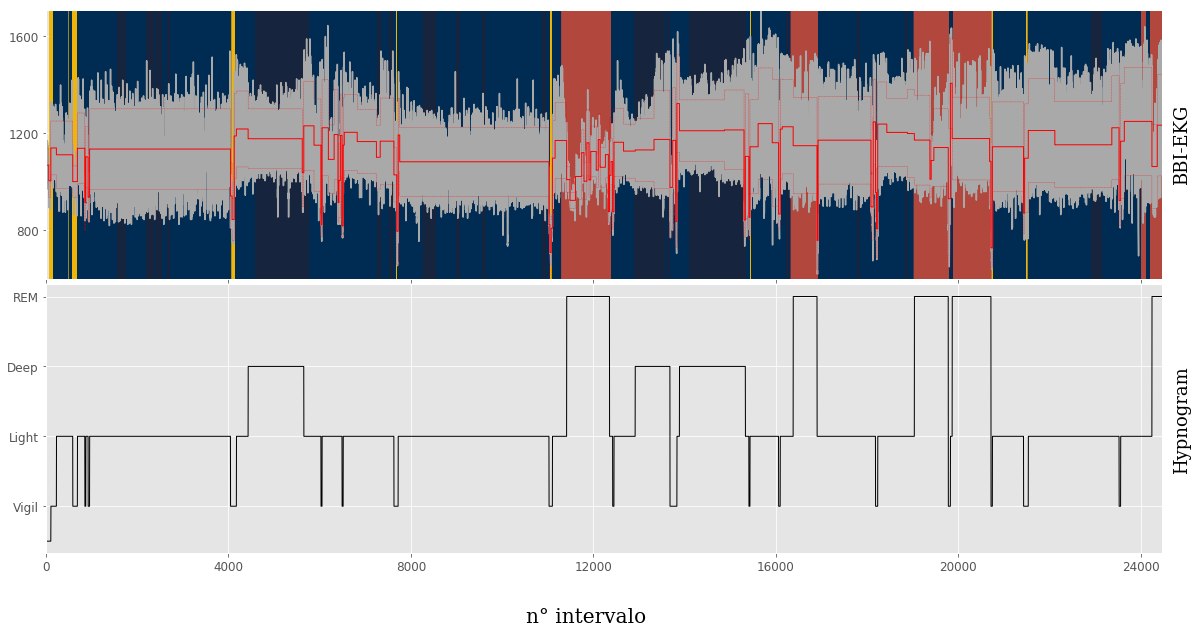

In [168]:
## Plota as séries

# Definição da função para gerar as cores de fundo
def axvlines(xs, c, max_val, ax=None, **plot_kwargs):
    """
    Draw vertical lines on plot
    :param xs: A scalar, list, or 1D array of horizontal offsets
    :param ax: The axis (or none to use gca)
    :param plot_kwargs: Keyword arguments to be passed to plot
    :return: The plot object corresponding to the lines.
    """
    if ax is None:
        ax = plt.gca()
    xs = np.array((xs, ) if np.isscalar(xs) else xs, copy=False)
    lims = ax.get_ylim()
    x_points = np.repeat(xs[:, None], repeats=3, axis=1).flatten()
    y_points = np.repeat(np.array(lims + (np.nan, ))[None, :], repeats=len(xs), axis=0).flatten()
    plot = ax.plot(x_points, max_val*y_points, scaley = False, **plot_kwargs, color = c)
    return plot

colors = ["#EFB509", "#002C54", "#16253D", "#B2473E"]
labels = ["Vigil", "Light", "Deep", "REM"]
groups = ["Hypertensive", "Normotensive", "Proband"]
t_serie = ["Serie 0", "Serie 1", "Serie 2", "Serie 3"]

grupo = 1
individuo = 13
serie = 2

fig, axs = plt.subplots(nrows = 2, ncols = 1)
fig.set_size_inches(20, 10)
fig.subplots_adjust(hspace = 0.02)
        

result = seg_res[grupo][individuo][serie]
series = data[grupo][individuo][t_serie[serie]]
time = data[grupo][individuo].index
means = np.zeros(0)
hypnogram = np.zeros(0)
upper_band = np.zeros(0)
lower_band = np.zeros(0)
max_val = series.max()
min_val = series.min()

for i in result.index:
    size = int(result.loc[i,'finish'] - result.loc[i, 'start'] + 1)
    means = np.concatenate((means, np.full([size], result.loc[i, 'mean'])))
    hypnogram = np.concatenate((hypnogram, np.full([size], result.loc[i, "SleepStage"])))
    upper_band = np.concatenate((upper_band, result.loc[i, 'mean'] + np.full([size], np.sqrt(result.loc[i, 'variance']))))
    lower_band = np.concatenate((lower_band, result.loc[i, 'mean'] - np.full([size], np.sqrt(result.loc[i, 'variance']))))
            
hypnogram[hypnogram == 66] = -0.5

for i in range(4):
    axvlines(data[grupo][individuo][data[grupo][individuo]["SleepStage"] == float(i)].index, colors[i], max_val, ax = axs[0])

axs[0].plot(time, series, color = 'darkgrey')
axs[0].plot(time, upper_band, 'r--', linewidth = 0.3, drawstyle = 'steps-post')
axs[0].plot(time, lower_band, 'r--', linewidth = 0.3, drawstyle = 'steps-post')
axs[0].plot(time, means, 'r-', linewidth = 1, drawstyle='steps-post', label='step-post')
axs[0].set_ylim(int(min_val) - 20, int(max_val))
axs[0].set_xlim(time[0], time[len(time)-1])
axs[0].xaxis.set_major_formatter(plt.NullFormatter())
        
#fig.savefig("Plots/Series - Final, Com Cores de Fundo/"+t_grupo[grupo]+"/Subject"+str(individuo)+".png")
#plt.close()
series = ["SBP", "DBP", "BBI-P", "BBI-EKG"]
axs[0].text(1.01, 0.5, series[i], fontsize = 18, rotation = "vertical", transform = axs[0].transAxes, va = 'center', family = 'serif')
    
axs[0].yaxis.set_major_locator(plt.MaxNLocator(3))
axs[0].yaxis.set_tick_params(labelsize=12)

axs[0].xaxis.set_tick_params(labelsize = 12)
axs[0].xaxis.set_major_locator(plt.MaxNLocator(8))

#axs[0].text(0.07, 0.5, "HRV", fontsize = 20, rotation = "vertical", transform = fig.transFigure, va = 'center', family = 'serif')
axs[0].text(0.5, 0.03, "n° intervalo", fontsize = 20, transform = fig.transFigure, ha = 'center', family = 'serif')

# ********************* Hypnogram *********************
axs[1].plot(time, hypnogram, 'k', linewidth = 1)
axs[1].set_xlim(time[0], time[len(time)-1])
axs[1].set_yticks([0, 1, 2, 3])

axs[1].xaxis.set_tick_params(labelsize = 12)
axs[1].yaxis.set_tick_params(labelsize = 12)
axs[1].xaxis.set_major_locator(plt.MaxNLocator(8))

axs[1].text(1.01, 0.5, "Hypnogram", fontsize = 18, rotation = "vertical", transform = axs[1].transAxes, va = 'center', family = 'serif')

fig.canvas.draw()
labels = [item.get_text() for item in axs[1].get_yticklabels()]
lbl = ["Vigil", "Light", "Deep", "REM"]
for i in range(4):
    labels[i] = lbl[i]

axs[1].set_yticklabels(labels)


### Séries (Juntas)

[Text(0, 0, 'Vigil'),
 Text(0, 1, 'Light'),
 Text(0, 2, 'Deep'),
 Text(0, 3, 'REM')]

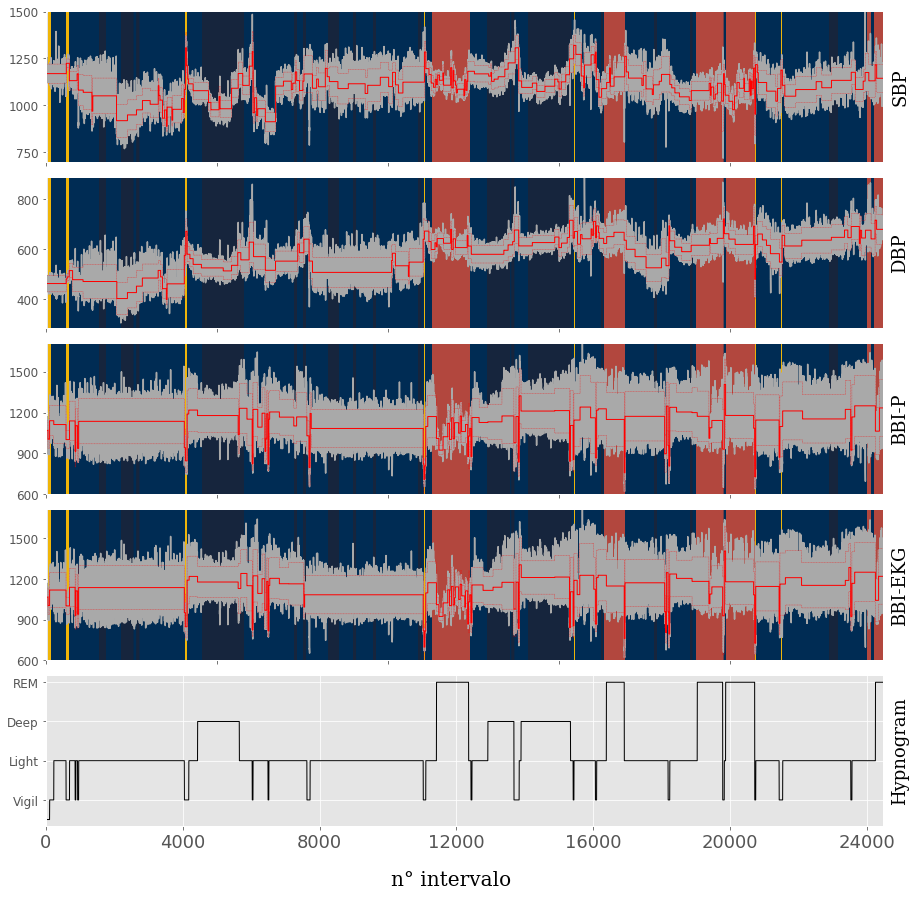

In [170]:
## Plota as séries

# Definição da função para gerar as cores de fundo
def axvlines(xs, c, max_val, ax=None, **plot_kwargs):
    """
    Draw vertical lines on plot
    :param xs: A scalar, list, or 1D array of horizontal offsets
    :param ax: The axis (or none to use gca)
    :param plot_kwargs: Keyword arguments to be passed to plot
    :return: The plot object corresponding to the lines.
    """
    if ax is None:
        ax = plt.gca()
    xs = np.array((xs, ) if np.isscalar(xs) else xs, copy=False)
    lims = ax.get_ylim()
    x_points = np.repeat(xs[:, None], repeats=3, axis=1).flatten()
    y_points = np.repeat(np.array(lims + (np.nan, ))[None, :], repeats=len(xs), axis=0).flatten()
    plot = ax.plot(x_points, max_val*y_points, scaley = False, **plot_kwargs, color = c)
    return plot

colors = ["#EFB509", "#002C54", "#16253D", "#B2473E"]
labels = ["Vigil", "Light", "Deep", "REM"]
groups = ["Hypertensive", "Normotensive", "Proband"]
t_serie = ["Serie 0", "Serie 1", "Serie 2", "Serie 3"]

grupo = 1
individuo = 13

fig, axs = plt.subplots(nrows = 5, ncols = 1)
fig.set_size_inches(15, 15)
fig.subplots_adjust(hspace = 0.1)
        
for serie in [0, 1, 2, 3]:
    axis = axs[serie]
    result = seg_res[grupo][individuo][serie]
    series = data[grupo][individuo][t_serie[serie]]
    time = data[grupo][individuo].index
    means = np.zeros(0)
    upper_band = np.zeros(0)
    lower_band = np.zeros(0)
    max_val = series.max()
    min_val = series.min()

    for i in result.index:
        size = int(result.loc[i,'finish'] - result.loc[i, 'start'] + 1)
        means = np.concatenate((means, np.full([size], result.loc[i, 'mean'])))
        upper_band = np.concatenate((upper_band, result.loc[i, 'mean'] + np.full([size], np.sqrt(result.loc[i, 'variance']))))
        lower_band = np.concatenate((lower_band, result.loc[i, 'mean'] - np.full([size], np.sqrt(result.loc[i, 'variance']))))
            
    for i in range(4):
        axvlines(data[grupo][individuo][data[grupo][individuo]["SleepStage"] == float(i)].index, colors[i], max_val, ax = axis)

    axis.plot(time, series, color = 'darkgrey')
    axis.plot(time, upper_band, 'r--', linewidth = 0.3, drawstyle = 'steps-post')
    axis.plot(time, lower_band, 'r--', linewidth = 0.3, drawstyle = 'steps-post')
    axis.plot(time, means, 'r-', linewidth = 1, drawstyle='steps-post', label='step-post')
    axis.set_xticks(range(0, int(time[len(time)-1]), 5000))
    axis.set_ylim(int(min_val) - 20, int(max_val))
    axis.set_xlim(time[0], time[len(time)-1])
    axis.xaxis.set_major_formatter(plt.NullFormatter())
        
#fig.savefig("Plots/Series - Final, Com Cores de Fundo/"+t_grupo[grupo]+"/Subject"+str(individuo)+".png")
#plt.close()
series = ["SBP", "DBP", "BBI-P", "BBI-EKG"]
for i in range(4):
    axs[i].text(1.01, 0.5, series[i], fontsize = 18, rotation = "vertical", transform = axs[i].transAxes, va = 'center', family = 'serif')
    
    axs[i].yaxis.set_major_locator(plt.MaxNLocator(4))
    axs[i].yaxis.set_tick_params(labelsize=12)

#axs[0].text(0.07, 0.5, "HRV", fontsize = 20, rotation = "vertical", transform = fig.transFigure, va = 'center', family = 'serif')
axs[0].text(0.5, 0.07, "n° intervalo", fontsize = 20, transform = fig.transFigure, ha = 'center', family = 'serif')

# ********************* Hypnogram *********************
axs[4].plot(time, hypnogram, 'k', linewidth = 1)
axs[4].set_xlim(time[0], time[len(time)-1])
axs[4].set_yticks([0, 1, 2, 3])

axs[4].xaxis.set_tick_params(labelsize = 18)
axs[4].yaxis.set_tick_params(labelsize = 12)
axs[4].xaxis.set_major_locator(plt.MaxNLocator(8))

axs[4].text(1.01, 0.5, "Hypnogram", fontsize = 18, rotation = "vertical", transform = axs[4].transAxes, va = 'center', family = 'serif')

fig.canvas.draw()
labels = [item.get_text() for item in axs[4].get_yticklabels()]
lbl = ["Vigil", "Light", "Deep", "REM"]
for i in range(4):
    labels[i] = lbl[i]

axs[4].set_yticklabels(labels)

***

In [3]:
plt.style.use('ggplot')

In [ ]:


# reset rcParams
plt.rcParams.update(IPython_default);



In [81]:
groups_titles = ["Hypertensive", "Normotensive", "Proband"]
series_titles = ["SBP", "DBP", "BBI-P", "BBI-EKG"]
measures_titles = [r'$\log(\overline{X})$', r'$\log(\sigma)$', r'$\log(L)$', r'$T_i$', r'$T_f$', r'$\Delta_t$', "Median", r'$\tau$']
stages = ["Vigil", "Light", "Deep", "REM"]
measures = [means, variances, lengths, t_i, t_f, delta_t, medians, increments]

### Boxplot (Dados separados)

In [ ]:
path = "Plots/Measures/4 Groups/Boxplot/"

# Creates all the figures, one for each parameters

fig_mean, axs_mean = plt.subplots(nrows = 4, ncols = 3)
fig_var, axs_var = plt.subplots(nrows = 4, ncols = 3)
fig_lg, axs_lg = plt.subplots(nrows = 4, ncols = 3)
fig_ti, axs_ti = plt.subplots(nrows = 4, ncols = 3)
fig_tf, axs_tf = plt.subplots(nrows = 4, ncols = 3)
fig_dt, axs_dt = plt.subplots(nrows = 4, ncols = 3)
fig_med, axs_med = plt.subplots(nrows = 4, ncols = 3)
fig_saltos, axs_saltos = plt.subplots(nrows = 4, ncols = 3)

# Creates all the lists for iteration
ylabels = ["log(Mean)", "log(Var)", "log(L)", r'$T_{i}$', r'$T_f$', r'$\Delta_t$', "log(Median)", "abs(Increments)"]
colors = ["#C4DFE6", "#66A5AD", "#07575B", "#003B46"]
figs = [fig_mean, fig_var, fig_lg, fig_ti, fig_tf, fig_dt, fig_med, fig_saltos]
axs  = [axs_mean, axs_var, axs_lg, axs_ti, axs_tf, axs_dt, axs_med, axs_saltos]

for fig in figs:
    fig.set_size_inches(15, 15)
    fig.subplots_adjust(hspace = 0.02, wspace = 0.2)

for i in range(8):
    ax = axs[i]
    for s in range(4):
        ax[s][2].text(1.02, 0.5, series_titles[s], fontsize = 20, rotation = "vertical", transform = ax[s][2].transAxes, va = 'center', family = 'serif')
        for g in range(3):
            ax[0][g].text(0.5, 1.02, groups_titles[g], fontsize = 18, transform = ax[0][g].transAxes, ha = 'center', family = 'serif')
            ax[s][g].yaxis.set_major_locator(plt.MaxNLocator(6))
            for ticks in ax[3][g].xaxis.get_major_ticks():
                ticks.label.set_fontsize(14)
                
    ax[0][0].text(0.04, 0.4, ylabels[i], fontsize = 22, rotation = "vertical", transform = fig.transFigure, va = 'center', family = 'serif')
    
import math
# Boxplot
for g in range(3):
    for s in range(4):
        for i in range(8):
            bplot = axs[i][s][g].boxplot(measures[i][g][s], labels = stages, patch_artist = True, showfliers = False, showmeans = True, meanline = True, notch = True)
            #axs[i][s][g].set_ylabel(ylabels[i], fontsize = 12) 
            plt.setp(bplot['medians'], color = 'red', linewidth = 1.5, label = 'Median')
            plt.setp(bplot['means'], color = 'b', linewidth = 1.5, label = 'Mean')
            for patch, color in zip(bplot['boxes'], colors):
                patch.set(facecolor = color)

for i in range(8):
    ax = axs[i]
    for s in range(3):
        for g in range(3):
            ax[s][g].set_xticklabels([])
                     
#for i in range(8):
#    figs[i].savefig(path+measures_titles[i]+".png")
#    plt.close(figs[i])

### Boxplot (Dados juntos)

In [174]:
# Junta os dados dos três grupos em uma mesma estrutura

for serie in range(4):
    means[0][serie].extend(means[1][serie]); means[0][serie].extend(means[2][serie])
    medians[0][serie].extend(medians[1][serie]); medians[0][serie].extend(medians[2][serie])
    variances[0][serie].extend(variances[1][serie]); variances[0][serie].extend(variances[2][serie])
    lengths[0][serie].extend(lengths[1][serie]); lengths[0][serie].extend(lengths[2][serie])
    t_i[0][serie].extend(t_i[1][serie]), t_i[0][serie].extend(t_i[2][serie])
    t_f[0][serie].extend(t_f[1][serie]), t_f[0][serie].extend(t_f[2][serie])
    delta_t[0][serie].extend(delta_t[1][serie]), delta_t[0][serie].extend(delta_t[2][serie])
    increments[0][serie].extend(increments[1][serie]), increments[0][serie].extend(increments[2][serie])
    
for i in range(2): 
    means.remove(means[1])
    medians.remove(medians[1])
    variances.remove(variances[1])
    lengths.remove(lengths[1])
    t_i.remove(t_i[1])
    t_f.remove(t_f[1])
    delta_t.remove(delta_t[1])
    increments.remove(increments[1])

In [ ]:
# Boxplot

path = "Plots/Measures/4 Groups/Boxplot/"

# Creates all the figures, one for each parameters

fig_mean, axs_mean = plt.subplots(nrows = 4, ncols = 1)
fig_var, axs_var = plt.subplots(nrows = 4, ncols = 1)
fig_lg, axs_lg = plt.subplots(nrows = 4, ncols = 1)
fig_ti, axs_ti = plt.subplots(nrows = 4, ncols = 1)
fig_tf, axs_tf = plt.subplots(nrows = 4, ncols = 1)
fig_dt, axs_dt = plt.subplots(nrows = 4, ncols = 1)
fig_med, axs_med = plt.subplots(nrows = 4, ncols = 1)
fig_saltos, axs_saltos = plt.subplots(nrows = 4, ncols = 1)

# Creates all the lists for iteration
ylabels = ["log(Mean)", "log(Var)", "log(L)", r'$T_{i}$', r'$T_f$', r'$\Delta_t$', "log(Median)", "abs(Increments)"]
colors = ["#C4DFE6", "#66A5AD", "#07575B", "#003B46",
          "#BC6D4F", "#9D331F", "#500805", "#1E0000",
          "#D0E1F9", "#4D648D", "#283655", "#1E1F26"]
measures = [means[0], variances[0], lengths[0], t_i[0], t_f[0], delta_t[0], medians[0], increments[0]]
figs = [fig_mean, fig_var, fig_lg, fig_ti, fig_tf, fig_dt, fig_med, fig_saltos]
axs  = [axs_mean, axs_var, axs_lg, axs_ti, axs_tf, axs_dt, axs_med, axs_saltos]
stages = ["Vigil", "Light", "Deep", "REM", "Vigil", "Light", "Deep", "REM", "Vigil", "Light", "Deep", "REM"]

for fig in figs:
    fig.set_size_inches(12, 20)
    fig.subplots_adjust(hspace = 0.02, wspace = 0.2)

for i in range(8):
    ax = axs[i]
    for s in range(4):
        ax[s].axvline(x = 4.5, color = 'k')
        ax[s].axvline(x = 8.5, color = 'k')
        ax[s].set_xticks(list(ax[s].get_xticks()) + [4.5, 8.5])
        ax[s].text(1.02, 0.5, series_titles[s], fontsize = 20, rotation = "vertical", transform = ax[s].transAxes, va = 'center', family = 'serif')
        
        #ax[0].text(0.5, 1.02, groups_titles[g], fontsize = 18, transform = ax[0].transAxes, ha = 'center', family = 'serif')
        ax[s].yaxis.set_major_locator(plt.MaxNLocator(6))
        for ticks in ax[3].xaxis.get_major_ticks():
            ticks.label.set_fontsize(14)
                
    ax[0].text(0.03, 0.4, ylabels[i], fontsize = 22, rotation = "vertical", transform = fig.transFigure, va = 'center', family = 'serif')
    ax[0].text(0.075, 1.05, "Hypertensive", fontsize = 20, rotation = "horizontal", transform = ax[0].transAxes, va = 'center', family = 'serif')
    ax[0].text(0.395, 1.05, "Normotensive", fontsize = 20, rotation = "horizontal", transform = ax[0].transAxes, va = 'center', family = 'serif')
    ax[0].text(0.77, 1.05, "Proband", fontsize = 20, rotation = "horizontal", transform = ax[0].transAxes, va = 'center', family = 'serif')
    
import math
# Boxplot


for s in range(4):
    for i in range(8):
        temp = copy.deepcopy(measures[i])
        temp[0]
        bplot = axs[i][s].boxplot(measures[i][s], labels = stages, patch_artist = True, showfliers = False, showmeans = True, meanline = True, notch = True)
        #axs[i][s][g].set_ylabel(ylabels[i], fontsize = 12) 
        plt.setp(bplot['medians'], color = 'red', linewidth = 1.5, label = 'Median')
        plt.setp(bplot['means'], color = 'b', linewidth = 1.5, label = 'Mean')
        for patch, color in zip(bplot['boxes'], colors):
            patch.set(facecolor = color)

for i in range(8):
    ax = axs[i]
    for s in range(3):
        ax[s].set_xticklabels([])
                     
#for i in range(8):
#    figs[i].savefig(path+measures_titles[i]+".png")
#    plt.close(figs[i])

### Boxplot (Dado isolado)

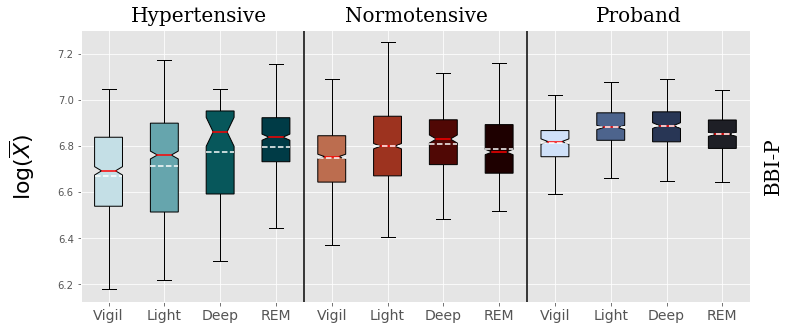

In [176]:
s = 2
i = 0

# Boxplot

path = "Plots/Measures/4 Groups/Boxplot/"

# Creates all the figures, one for each parameters

fig, ax = plt.subplots(nrows = 1, ncols = 1)

# Creates all the lists for iteration
ylabels = [r'$\log (\overline{X})$', "log(Var)", "log(L)", r'$T_{i}$', r'$T_f$', r'$\Delta_t$', "log(Median)", "abs(Increments)"]
colors = ["#C4DFE6", "#66A5AD", "#07575B", "#003B46",
          "#BC6D4F", "#9D331F", "#500805", "#1E0000",
          "#D0E1F9", "#4D648D", "#283655", "#1E1F26"]
measures = [means[0], variances[0], lengths[0], t_i[0], t_f[0], delta_t[0], medians[0], increments[0]]
stages = ["Vigil", "Light", "Deep", "REM", "Vigil", "Light", "Deep", "REM", "Vigil", "Light", "Deep", "REM"]


fig.set_size_inches(12, 5)
fig.subplots_adjust(hspace = 0.02, wspace = 0.2)

ax.axvline(x = 4.5, color = 'k')
ax.axvline(x = 8.5, color = 'k')
ax.text(1.02, 0.5, series_titles[s], fontsize = 20, rotation = "vertical", transform = ax.transAxes, va = 'center', family = 'serif')
        
#ax[0].text(0.5, 1.02, groups_titles[g], fontsize = 18, transform = ax[0].transAxes, ha = 'center', family = 'serif')
ax.yaxis.set_major_locator(plt.MaxNLocator(6))
for ticks in ax.xaxis.get_major_ticks():
    ticks.label.set_fontsize(14)
                
ax.text(0.04, 0.5, ylabels[i], fontsize = 22, rotation = "vertical", transform = fig.transFigure, va = 'center', family = 'serif')
ax.text(0.075, 1.05, "Hypertensive", fontsize = 20, rotation = "horizontal", transform = ax.transAxes, va = 'center', family = 'serif')
ax.text(0.395, 1.05, "Normotensive", fontsize = 20, rotation = "horizontal", transform = ax.transAxes, va = 'center', family = 'serif')
ax.text(0.77, 1.05, "Proband", fontsize = 20, rotation = "horizontal", transform = ax.transAxes, va = 'center', family = 'serif')
    
import math
# Boxplot

temp = copy.deepcopy(measures[i])
temp[0]
bplot = ax.boxplot(measures[i][s], labels = stages, patch_artist = True, showfliers = False, showmeans = True, meanline = True, notch = True)
#axs[i][s][g].set_ylabel(ylabels[i], fontsize = 12) 
plt.setp(bplot['medians'], color = 'red', linewidth = 1.5, label = 'Median')
plt.setp(bplot['means'], color = 'w', linewidth = 1.5, label = 'Mean')
for patch, color in zip(bplot['boxes'], colors):
    patch.set(facecolor = color)
                     
#for i in range(8):
#    figs[i].savefig(path+measures_titles[i]+".png")
#    plt.close(figs[i])

***

### Empirical CDF (Separados)

In [ ]:
# Empirical CDF

path = "Plots/Measures/4 Groups/EmpiricalCDF/"

# Create figures
fig_mean_cdf, axs_mean_cdf = plt.subplots(nrows = 4, ncols = 3)

fig_var_cdf, axs_var_cdf   = plt.subplots(nrows = 4, ncols = 3)

fig_lg_cdf, axs_lg_cdf     = plt.subplots(nrows = 4, ncols = 3)

fig_ti_cdf, axs_ti_cdf     = plt.subplots(nrows = 4, ncols = 3)

fig_tf_cdf, axs_tf_cdf     = plt.subplots(nrows = 4, ncols = 3)

fig_dt_cdf, axs_dt_cdf     = plt.subplots(nrows = 4, ncols = 3)

fig_med_cdf, axs_med_cdf   = plt.subplots(nrows = 4, ncols = 3)

fig_inc_cdf, axs_inc_cdf   = plt.subplots(nrows = 4, ncols = 3)

# Creates all the lists for iteration
colors    = ["gold", "steelblue", "purple", "black"]
ylabels = [r'$F_n(\log(\overline{X})$', r'$F_n(\log(\sigma))$', r'$F_n(\log(L))$', r'$T_i$', r'$T_f$', r'$\Delta_t$', r'$F_n(\log(Median))$', r'$F_n(|\tau|)$']
axs = [axs_mean_cdf, axs_var_cdf, axs_lg_cdf, axs_ti_cdf, axs_tf_cdf, axs_dt_cdf, axs_med_cdf, axs_inc_cdf]
figs = [fig_mean_cdf, fig_var_cdf, fig_lg_cdf, fig_ti_cdf, fig_tf_cdf, fig_dt_cdf, fig_med_cdf, fig_inc_cdf]

# Configure figure sizes and axis distances
for item in figs:
    item.set_size_inches(20, 20)
    item.subplots_adjust(hspace = 0.2, wspace = 0.05)

# Configure title sizes
for ax_arr in axs:
    for i in range(4):
        for j in range(3):
            ax_arr[i][j].title.set_fontsize(14)
            ax_arr[i][j].xaxis.label.set_fontsize(14)
            ax_arr[i][j].yaxis.label.set_fontsize(14)
            for ticks in ax_arr[i][j].xaxis.get_major_ticks():
                ticks.label.set_fontsize(12)

        for j in [1, 2]:
            ax_arr[i][j].yaxis.set_major_formatter(plt.NullFormatter())

            
# Plot all curves
for m in range(8):
    axs[m][0][0].text(0.07, 0.5, ylabels[m], fontsize = 22, rotation = "vertical", transform = figs[m].transFigure, va = 'center', family = 'serif')
    axs[m][0][0].text(0.5, 0.09, measures_titles[m], fontsize = 22, rotation = "horizontal", transform = figs[m].transFigure, va = 'center', family = 'serif')
    for s in range(4):
        axs[m][s][2].text(1.02, 0.5, series_titles[s], fontsize = 20, rotation = "vertical", transform = axs[m][s][2].transAxes, va = 'center', family = 'serif')
        for g in range(3):
            axs[m][0][g].text(0.5, 1.028, groups_titles[g], fontsize = 18, transform = axs[m][0][g].transAxes, ha = 'center', family = 'serif')
            measure = measures[m][g][s]
            
            # Computes the cumulative density function
            Fn = [[], [], [], []]
            for i in range(4):
                measure[i].sort()
                Fn[i] = -np.sort(-np.arange(len(measure[i]))/float(len(measure[i])))
             
            for i in range(4):
                ax = axs[m][s][g]
                ax.scatter(measure[i], Fn[i], color = colors[i], s = 5, label = stages[i], marker = '.')
                #ax.set_xlabel(measures_titles[m])
                #ax.set_ylabel('1 - '+ylabels[m])
                #ax.set_title(groups_titles[g]+": CDF - "+measures_titles[m]+" - "+series_titles[s])
                ax.legend(fontsize = 12, markerscale = 8)
            
    #figs[m].savefig(path+measures_titles[m]+".png")
    #plt.close(figs[m])

### Empirical CDF (Juntos)

In [ ]:
# Empirical CDF

path = "Plots/Measures/4 Groups/EmpiricalCDF/"

# Create figures
fig_mean_cdf, axs_mean_cdf = plt.subplots(nrows = 4, ncols = 1)

fig_var_cdf, axs_var_cdf   = plt.subplots(nrows = 4, ncols = 1)

fig_lg_cdf, axs_lg_cdf     = plt.subplots(nrows = 4, ncols = 1)

fig_ti_cdf, axs_ti_cdf     = plt.subplots(nrows = 4, ncols = 1)

fig_tf_cdf, axs_tf_cdf     = plt.subplots(nrows = 4, ncols = 1)

fig_dt_cdf, axs_dt_cdf     = plt.subplots(nrows = 4, ncols = 1)

fig_med_cdf, axs_med_cdf   = plt.subplots(nrows = 4, ncols = 1)

fig_inc_cdf, axs_inc_cdf   = plt.subplots(nrows = 4, ncols = 1)

# Creates all the lists for iteration
colors    = ["#C4DFE6", "#66A5AD", "#07575B", "#003B46",
             "#B3DE81", "#C7DB00", "#68A225", "#265C00",
             "#BC6D4F", "#9D331F", "#500805", "#1E0000"]
groups_titles = ["HT", "NT", "PB"]
ylabels = [r'$F_n(\log(\overline{X})$', r'$F_n(\log(\sigma))$', r'$F_n(\log(L))$', r'$T_i$', r'$T_f$', r'$\Delta_t$', r'$F_n(\log(Median))$', r'$F_n(|\tau|)$']
markers = ['.', 'x', ',']
axs = [axs_mean_cdf, axs_var_cdf, axs_lg_cdf, axs_ti_cdf, axs_tf_cdf, axs_dt_cdf, axs_med_cdf, axs_inc_cdf]
figs = [fig_mean_cdf, fig_var_cdf, fig_lg_cdf, fig_ti_cdf, fig_tf_cdf, fig_dt_cdf, fig_med_cdf, fig_inc_cdf]

# Configure figure sizes and axis distances
for item in figs:
    item.set_size_inches(15, 30)
    item.subplots_adjust(hspace = 0.2, wspace = 0.05)

# Configure title sizes
for ax_arr in axs:
    for i in range(4):
        ax_arr[i].title.set_fontsize(14)
        ax_arr[i].xaxis.label.set_fontsize(14)
        ax_arr[i].yaxis.label.set_fontsize(14)
        for ticks in ax_arr[i].xaxis.get_major_ticks():
            ticks.label.set_fontsize(12)

        #axs[i].yaxis.set_major_formatter(plt.NullFormatter())

            
# Plot all curves
for m in range(8):                                                                   ## Specify the measure to be plotted here.
    axs[m][0].text(0.07, 0.5, ylabels[m], fontsize = 22, rotation = "vertical", transform = figs[m].transFigure, va = 'center', family = 'serif')
    axs[m][0].text(0.5, 0.09, measures_titles[m], fontsize = 22, rotation = "horizontal", transform = figs[m].transFigure, va = 'center', family = 'serif')
    for s in range(4):
        axs[m][s].text(1.02, 0.5, series_titles[s], fontsize = 20, rotation = "vertical", transform = axs[m][s].transAxes, va = 'center', family = 'serif')
        for g in range(3):
            #axs[0][g].text(0.5, 1.028, groups_titles[g], fontsize = 18, transform = axs[0][g].transAxes, ha = 'center', family = 'serif')
            measure = measures[m][g][s]
            
            # Computes the cumulative density function
            Fn = [[], [], [], []]
            for i in range(4):
                measure[i].sort()
                Fn[i] = -np.sort(-np.arange(len(measure[i]))/float(len(measure[i])))
             
            for i in range(4):
                ax = axs[m][s] # Edite e adicione o m depois.
                ax.scatter(measure[i], Fn[i], color = colors[i + g*4], s = 10, label = groups_titles[g]+" - "+stages[i], marker = ',')
                #ax.set_xlabel(measures_titles[m])
                #ax.set_ylabel('1 - '+ylabels[m])
                #ax.set_title(groups_titles[g]+": CDF - "+measures_titles[m]+" - "+series_titles[s])
                ax.legend(fontsize = 12, markerscale = 5)
            
    #figs[m].savefig(path+measures_titles[m]+".png")
    #plt.close(figs[m])

### Empirical CDF (Plot único)

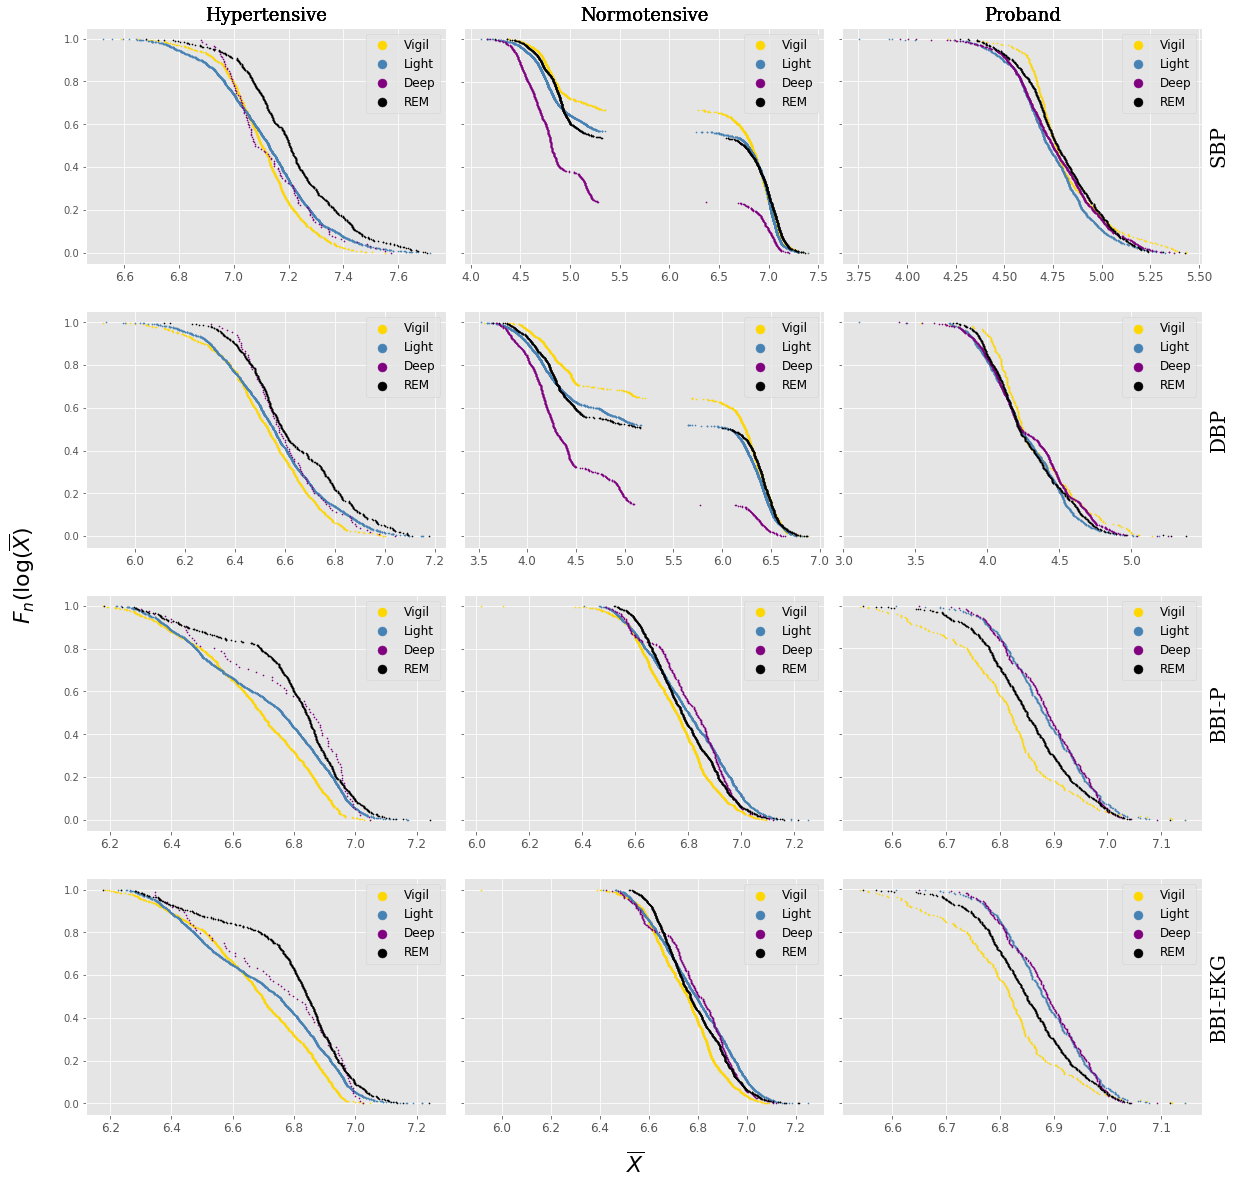

In [48]:
# Empirical CDF

path = "Plots/Measures/4 Groups/EmpiricalCDF/"

# Create figures
fig, axs = plt.subplots(nrows = 4, ncols = 3)

# Creates all the lists for iteration
colors    = ["gold", "steelblue", "purple", "black"]
ylabels = [r'$F_n(\log(\overline{X})$']
#axs = [axs_mean_cdf, axs_var_cdf, axs_lg_cdf, axs_ti_cdf, axs_tf_cdf, axs_dt_cdf, axs_med_cdf, axs_inc_cdf]
#figs = [fig_mean_cdf, fig_var_cdf, fig_lg_cdf, fig_ti_cdf, fig_tf_cdf, fig_dt_cdf, fig_med_cdf, fig_inc_cdf]

# Configure figure sizes and axis distances
fig.set_size_inches(20, 20)
fig.subplots_adjust(hspace = 0.2, wspace = 0.05)

# Configure title sizes
for i in range(4):
    for j in range(3):
        axs[i][j].title.set_fontsize(14)
        axs[i][j].xaxis.label.set_fontsize(14)
        axs[i][j].yaxis.label.set_fontsize(14)
        for ticks in axs[i][j].xaxis.get_major_ticks():
            ticks.label.set_fontsize(12)
        
    for j in [1, 2]:
        axs[i][j].yaxis.set_major_formatter(plt.NullFormatter())

            
# Plot all curves
for m in range(1):                                                                   ## Specify the measure to be plotted here.
    axs[0][0].text(0.07, 0.5, ylabels[m], fontsize = 22, rotation = "vertical", transform = fig.transFigure, va = 'center', family = 'serif')
    axs[0][0].text(0.5, 0.09, measures_titles[m], fontsize = 22, rotation = "horizontal", transform = fig.transFigure, va = 'center', family = 'serif')
    for s in range(4):
        axs[s][2].text(1.02, 0.5, series_titles[s], fontsize = 20, rotation = "vertical", transform = axs[s][2].transAxes, va = 'center', family = 'serif')
        for g in range(3):
            axs[0][g].text(0.5, 1.028, groups_titles[g], fontsize = 18, transform = axs[0][g].transAxes, ha = 'center', family = 'serif')
            measure = measures[m][g][s]
            
            # Computes the cumulative density function
            Fn = [[], [], [], []]
            for i in range(4):
                measure[i].sort()
                Fn[i] = -np.sort(-np.arange(len(measure[i]))/float(len(measure[i])))
             
            for i in range(4):
                ax = axs[s][g] # Edite e adicione o m depois.
                ax.scatter(measure[i], Fn[i], color = colors[i], s = 5, label = stages[i], marker = '.')
                #ax.set_xlabel(measures_titles[m])
                #ax.set_ylabel('1 - '+ylabels[m])
                #ax.set_title(groups_titles[g]+": CDF - "+measures_titles[m]+" - "+series_titles[s])
                ax.legend(fontsize = 12, markerscale = 8)
            
    #figs[m].savefig(path+measures_titles[m]+".png")
    #plt.close(figs[m])

### Empirical CDF (Juntos - Plot único)

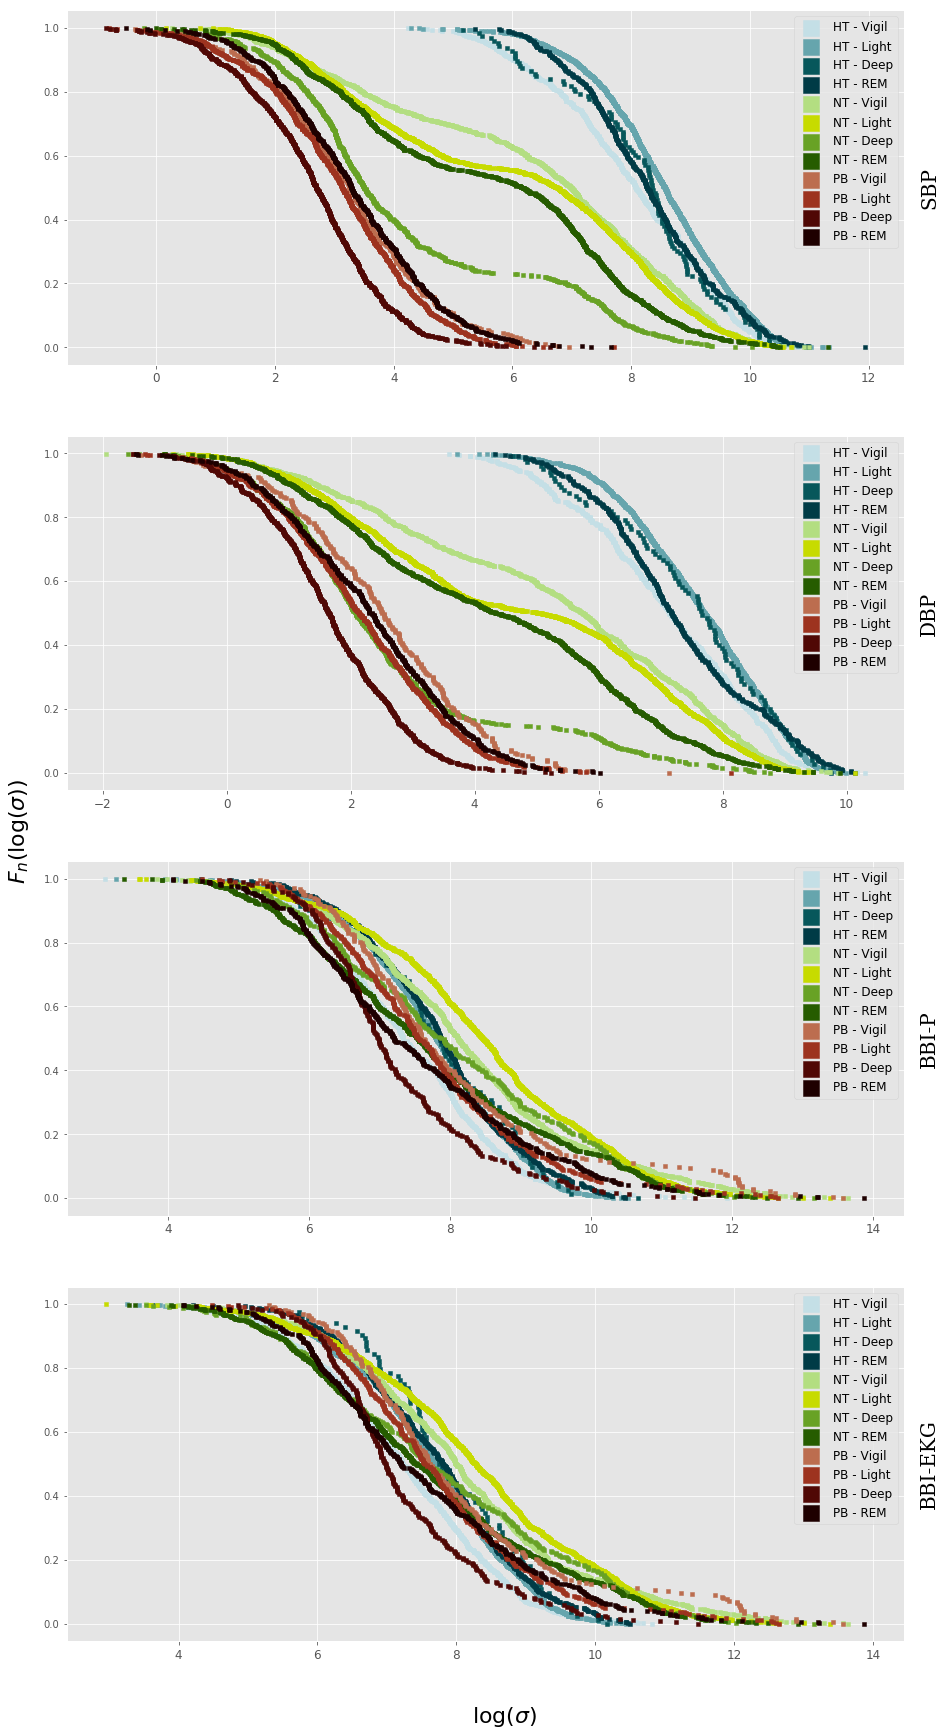

In [82]:
# Empirical CDF

path = "Plots/Measures/4 Groups/EmpiricalCDF/"

# Create figures
fig, axs = plt.subplots(nrows = 4, ncols = 1)

# Creates all the lists for iteration
colors    = ["#C4DFE6", "#66A5AD", "#07575B", "#003B46",
             "#B3DE81", "#C7DB00", "#68A225", "#265C00",
             "#BC6D4F", "#9D331F", "#500805", "#1E0000"]
groups_titles = ["HT", "NT", "PB"]
ylabels = [r'$F_n(\log(\overline{X})$', r'$F_n(\log(\sigma))$', r'$F_n(\log(L))$', r'$T_i$', r'$T_f$', r'$\Delta_t$', r'$F_n(\log(Median))$', r'$F_n(|\tau|)$']
markers = ['.', 'x', ',']
#axs = [axs_mean_cdf, axs_var_cdf, axs_lg_cdf, axs_ti_cdf, axs_tf_cdf, axs_dt_cdf, axs_med_cdf, axs_inc_cdf]
#figs = [fig_mean_cdf, fig_var_cdf, fig_lg_cdf, fig_ti_cdf, fig_tf_cdf, fig_dt_cdf, fig_med_cdf, fig_inc_cdf]

# Configure figure sizes and axis distances
fig.set_size_inches(15, 30)
fig.subplots_adjust(hspace = 0.2, wspace = 0.05)

# Configure title sizes
for i in range(4):
    axs[i].title.set_fontsize(14)
    axs[i].xaxis.label.set_fontsize(14)
    axs[i].yaxis.label.set_fontsize(14)
    for ticks in axs[i].xaxis.get_major_ticks():
        ticks.label.set_fontsize(12)
        
    #axs[i].yaxis.set_major_formatter(plt.NullFormatter())

            
# Plot all curves
for m in [1]:                                                                   ## Specify the measure to be plotted here.
    axs[0].text(0.07, 0.5, ylabels[m], fontsize = 22, rotation = "vertical", transform = fig.transFigure, va = 'center', family = 'serif')
    axs[0].text(0.5, 0.09, measures_titles[m], fontsize = 22, rotation = "horizontal", transform = fig.transFigure, va = 'center', family = 'serif')
    for s in range(4):
        axs[s].text(1.02, 0.5, series_titles[s], fontsize = 20, rotation = "vertical", transform = axs[s].transAxes, va = 'center', family = 'serif')
        for g in range(3):
            #axs[0][g].text(0.5, 1.028, groups_titles[g], fontsize = 18, transform = axs[0][g].transAxes, ha = 'center', family = 'serif')
            measure = measures[m][g][s]
            
            # Computes the cumulative density function
            Fn = [[], [], [], []]
            for i in range(4):
                measure[i].sort()
                Fn[i] = -np.sort(-np.arange(len(measure[i]))/float(len(measure[i])))
             
            for i in range(4):
                ax = axs[s] # Edite e adicione o m depois.
                ax.scatter(measure[i], Fn[i], color = colors[i + g*4], s = 10, label = groups_titles[g]+" - "+stages[i], marker = ',')
                #ax.set_xlabel(measures_titles[m])
                #ax.set_ylabel('1 - '+ylabels[m])
                #ax.set_title(groups_titles[g]+": CDF - "+measures_titles[m]+" - "+series_titles[s])
                ax.legend(fontsize = 12, markerscale = 5)
            
    #figs[m].savefig(path+measures_titles[m]+".png")
    #plt.close(figs[m])

***

### Density Plot (Separados)

In [ ]:
# Density Function

path = "Plots/Measures/4 Groups/Density/"

# Create figures
fig_mean, axs_mean = plt.subplots(nrows = 4, ncols = 3)

fig_var, axs_var = plt.subplots(nrows = 4, ncols = 3)

fig_lg, axs_lg = plt.subplots(nrows = 4, ncols = 3)

fig_ti, axs_ti = plt.subplots(nrows = 4, ncols = 3)

fig_tf, axs_tf = plt.subplots(nrows = 4, ncols = 3)

fig_dt, axs_dt = plt.subplots(nrows = 4, ncols = 3)

fig_med, axs_med = plt.subplots(nrows = 4, ncols = 3)

fig_inc, axs_inc = plt.subplots(nrows = 4, ncols = 3)


# Creates all the lists for iteration
colors     = ["gold", "steelblue", "purple", "black"]
ylabels = [r'$F_n(\log(\overline{X})$', r'$F_n(\log(\sigma))$', r'$F_n(\log(L))$', r'$T_i$', r'$T_f$', r'$\Delta_t$', r'$F_n(\log(Median))$', r'$F_n(|\tau|)$']
axs  = [axs_mean, axs_var, axs_lg, axs_ti, axs_tf, axs_dt, axs_med, axs_inc]
figs = [fig_mean, fig_var, fig_lg, fig_ti, fig_tf, fig_dt, fig_med, fig_inc]

# Configure figure sizes and axis distances
for item in figs:
    item.set_size_inches(20, 20)
    item.subplots_adjust(hspace = 0.2, wspace = 0.05)

# Configure title sizes
for ax_arr in axs:
    for i in range(4):
        for j in range(3):
            ax_arr[i][j].title.set_fontsize(14)
            ax_arr[i][j].xaxis.label.set_fontsize(14)
            ax_arr[i][j].yaxis.label.set_fontsize(14)
            for ticks in ax_arr[i][j].xaxis.get_major_ticks():
                ticks.label.set_fontsize(12)

        for j in [1, 2]:
            ax_arr[i][j].yaxis.set_major_formatter(plt.NullFormatter())
            

# Plot all curves
for m in range(8):
    axs[m][0][0].text(0.07, 0.5, ylabels[m], fontsize = 22, rotation = "vertical", transform = figs[m].transFigure, va = 'center', family = 'serif')
    axs[m][0][0].text(0.5, 0.09, measures_titles[m], fontsize = 22, rotation = "horizontal", transform = figs[m].transFigure, va = 'center', family = 'serif')
    for s in range(4):
        axs[m][s][2].text(1.02, 0.5, series_titles[s], fontsize = 20, rotation = "vertical", transform = axs[m][s][2].transAxes, va = 'center', family = 'serif')
        for g in range(3):
            axs[m][0][g].text(0.5, 1.028, groups_titles[g], fontsize = 18, transform = axs[m][0][g].transAxes, ha = 'center', family = 'serif')
            measure = measures[m][g][s]
            
            for i in range(4):
                axis = axs[m][s][g]
                sns.distplot(measure[i], hist = False, kde = True, kde_kws = {'linewidth' : 3}, ax = axis,
                             color = colors[i], label = stages[i])
                #axis.set_xlabel(measures_titles[m])
                #axis.set_ylabel(ylabels[m])
                #axis.set_title("p(x) - "+measures_titles[m]+" - "+groups_titles[g]+" - "+series_titles[s])
            
    #figs[m].savefig(path+measures_titles[m]+".png")
    #plt.close(figs[m])

### Density Plot (Plot Único)

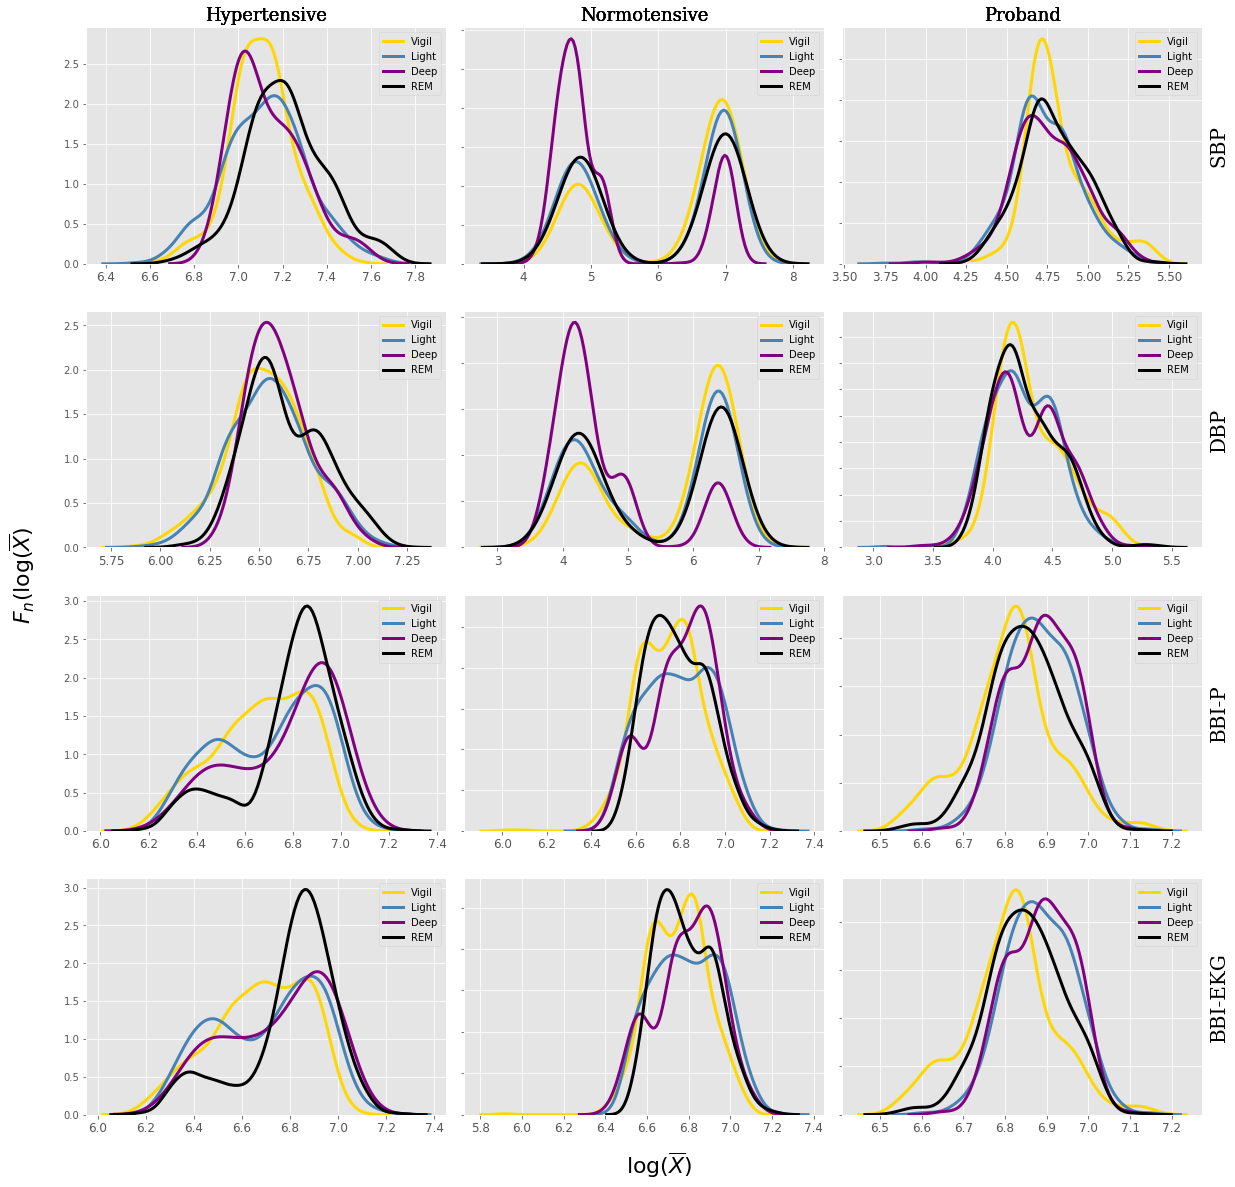

In [94]:
# Empirical CDF

path = "Plots/Measures/4 Groups/EmpiricalCDF/"

# Create figures
fig, axs = plt.subplots(nrows = 4, ncols = 3)

# Creates all the lists for iteration
colors    = ["gold", "steelblue", "purple", "black"]
ylabels = [r'$F_n(\log(\overline{X})$']
groups_titles = ["Hypertensive", "Normotensive", "Proband"]
#axs = [axs_mean_cdf, axs_var_cdf, axs_lg_cdf, axs_ti_cdf, axs_tf_cdf, axs_dt_cdf, axs_med_cdf, axs_inc_cdf]
#figs = [fig_mean_cdf, fig_var_cdf, fig_lg_cdf, fig_ti_cdf, fig_tf_cdf, fig_dt_cdf, fig_med_cdf, fig_inc_cdf]

# Configure figure sizes and axis distances
fig.set_size_inches(20, 20)
fig.subplots_adjust(hspace = 0.2, wspace = 0.05)

# Configure title sizes
for i in range(4):
    for j in range(3):
        axs[i][j].title.set_fontsize(14)
        axs[i][j].xaxis.label.set_fontsize(14)
        axs[i][j].yaxis.label.set_fontsize(14)
        for ticks in axs[i][j].xaxis.get_major_ticks():
            ticks.label.set_fontsize(12)
        
    for j in [1, 2]:
        axs[i][j].yaxis.set_major_formatter(plt.NullFormatter())

            
# Plot all curves
for m in range(1):
    axs[0][0].text(0.07, 0.5, ylabels[m], fontsize = 22, rotation = "vertical", transform = fig.transFigure, va = 'center', family = 'serif')
    axs[0][0].text(0.5, 0.09, measures_titles[m], fontsize = 22, rotation = "horizontal", transform = fig.transFigure, va = 'center', family = 'serif')
    for s in range(4):
        axs[s][2].text(1.02, 0.5, series_titles[s], fontsize = 20, rotation = "vertical", transform = axs[s][2].transAxes, va = 'center', family = 'serif')
        for g in range(3):
            axs[0][g].text(0.5, 1.028, groups_titles[g], fontsize = 18, transform = axs[0][g].transAxes, ha = 'center', family = 'serif')
            measure = measures[m][g][s]
            
            for i in range(4):
                axis = axs[s][g]
                sns.distplot(measure[i], hist = False, kde = True, kde_kws = {'linewidth' : 3}, ax = axis,
                             color = colors[i], label = stages[i])
                #axis.set_xlabel(measures_titles[m])
                #axis.set_ylabel(ylabels[m])
                #axis.set_title("p(x) - "+measures_titles[m]+" - "+groups_titles[g]+" - "+series_titles[s])
            
    #figs[m].savefig(path+measures_titles[m]+".png")
    #plt.close(figs[m])